In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [5]:
dataset = np.loadtxt('ex5.csv', delimiter=',')
print(dataset)
#podział na dane i etykiety, 1 - cukrzyk, 0 - zdrowy
X = dataset[:,0:8]
y = dataset[:,8]

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


Zmienne wejściowe:
Liczba ciąż
Stężenie glukozy w osoczu po 2 godzinach w doustnym teście tolerancji glukozy
Rozkurczowe ciśnienie krwi (mm Hg)
Grubość fałdu skórnego tricepsa (mm)
2-godzinne stężenie insuliny w surowicy (μIU/ml)
Wskaźnik masy ciała (waga w kg/(wzrost w m)2)
Funkcja rodowodu cukrzycy
Wiek (lata)

Y: Etykieta klasy (0 lub 1)

In [11]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
print(y)

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
      

C:\Users\smonn\AppData\Local\Temp\ipykernel_4852\1146932885.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
C:\Users\smonn\AppData\Local\Temp\ipykernel_4852\1146932885.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


In [12]:

model = nn.Sequential(  #seq - chcemy sieć warstową
    nn.Linear(8, 12),   #model liniowy, zaczynamy od 8 neuronów, przesyłamy do warstwy z dwunastoma
    nn.ReLU(),          #funkcja aktywacyjna (nieiniowa)
    nn.Linear(12, 8),   #kolejna warstwa liniowa, z 12 do 8, 12 ważne, 8 obojetne
    nn.ReLU(),          #kolejna fun aktyw
    nn.Linear(8, 1),    #konczymy warstwy, na końcu jedna cecha, czyli dane zostaną sklasyfikowane binarnie (chory lub nie)
    nn.Sigmoid())       #funkcja sigmoidalna, prawdopodobiensto przy binarce

In [13]:
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [43]:

# Importuj bibliotekę PyTorch.
import torch.nn as nn

# Definiuj klasę Classifier, która dziedziczy po nn.Module z PyTorch.
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        # Definiuj warstwy sieci neuronowej.
        self.hidden1 = nn.Linear(8, 12)  # Warstwa ukryta 1 z 8 wejściami i 12 wyjściami.
        self.act1 = nn.ReLU()  # Funkcja aktywacji ReLU po warstwie ukrytej 1.
        self.hidden2 = nn.Linear(12, 8)  # Warstwa ukryta 2 z 12 wejściami i 8 wyjściami.
        self.act2 = nn.ReLU()  # Funkcja aktywacji ReLU po warstwie ukrytej 2.
        self.output = nn.Linear(8, 1)  # Warstwa wyjściowa z 8 wejściami i 1 wyjściem.
        self.act_output = nn.Sigmoid()  # Funkcja aktywacji Sigmoid po warstwie wyjściowej.

    def forward(self, x):
        # Określa przód (forward pass) sieci neuronowej.
        x = self.act1(self.hidden1(x))  # Przeprowadza dane przez warstwę ukrytą 1 z ReLU.
        x = self.act2(self.hidden2(x))  # Przeprowadza dane przez warstwę ukrytą 2 z ReLU.
        x = self.act_output(self.output(x))  # Przeprowadza dane przez warstwę wyjściową z Sigmoid.
        return x

# Tworzy instancję modelu klasyfikatora.
model = Classifier()

# Wyświetla definicję modelu.
print(model)


Classifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [44]:
#funkcja straty i optymalizacyjna
loss_fn = nn.BCELoss() #binary cros entropy
optimizer = optim.Adam(model.parameters(), lr=0.001) #learning rate - mniejsza, wolniej ale dokładniej, wieksza, szybciej ale mniej dokładnie

In [45]:
# Liczba epok i rozmiar partii (batch size) w treningu.
n_epochs = 100 #epoka - jedno przejscie przez sieć
batch_size = 10 # do sieci nie wrzuca się wszystkich danych naraz tylko w paczkach (batchach)

# Pętla treningowa po epokach.
for epoch in range(n_epochs):
    # Pętla treningowa po danych treningowych z podziałem na partie (mini-batch).
    for i in range(0, len(X), batch_size):
        # weź jedną paczkę (0:10, 10:20 ...)
        Xbatch = X[i:i+batch_size]
        
        # Przewiduje wyniki za pomocą modelu.
        y_pred = model(Xbatch)
        
        # weź realne wyniki 
        ybatch = y[i:i+batch_size]
        
        # porownaj realne z predictem i wylicz stratę
        loss = loss_fn(y_pred, ybatch)
        
        # Wyzerowuje gradienty w optymalizatorze.
        optimizer.zero_grad()
        
        # Oblicza gradienty straty wstecz (backpropagation).
        loss.backward()
        
        # Aktualizuje wagi modelu na podstawie gradientów.
        optimizer.step()
    
    # Wyświetla informacje o postępie treningu po każdej epoce.
    print(f'Epoka {epoch}, funkcja straty {loss}')

Epoka 0, funkcja straty 0.5018962025642395
Epoka 1, funkcja straty 0.46620500087738037
Epoka 2, funkcja straty 0.44237205386161804
Epoka 3, funkcja straty 0.43939581513404846
Epoka 4, funkcja straty 0.4387891888618469
Epoka 5, funkcja straty 0.4418601095676422
Epoka 6, funkcja straty 0.4399087429046631
Epoka 7, funkcja straty 0.44107887148857117
Epoka 8, funkcja straty 0.44126611948013306
Epoka 9, funkcja straty 0.44267991185188293
Epoka 10, funkcja straty 0.44478562474250793
Epoka 11, funkcja straty 0.44560256600379944
Epoka 12, funkcja straty 0.4494945704936981
Epoka 13, funkcja straty 0.4513058364391327
Epoka 14, funkcja straty 0.44997867941856384
Epoka 15, funkcja straty 0.4501210153102875
Epoka 16, funkcja straty 0.4494994878768921
Epoka 17, funkcja straty 0.45332005620002747
Epoka 18, funkcja straty 0.45423561334609985
Epoka 19, funkcja straty 0.45327669382095337
Epoka 20, funkcja straty 0.4548243284225464
Epoka 21, funkcja straty 0.4525006413459778
Epoka 22, funkcja straty 0.441

In [41]:
for name, param in model.named_parameters():
    print(name,param.data)
#wyswietlenie wag i biasow

hidden1.weight tensor([[ 0.2718, -0.4622, -0.1692, -0.1580,  0.1640, -0.4429,  1.7011, -0.0578],
        [ 0.0510, -0.2825, -0.1407, -0.0464,  0.1094, -0.4303,  0.2121, -0.4410],
        [ 0.2520, -0.1854,  0.4417, -0.3992,  0.1222, -0.2979, -0.7479, -0.5387],
        [ 0.2869, -0.1861, -0.2996,  0.1911, -0.3443, -0.1503, -0.0666,  0.2818],
        [-0.0172,  0.0348, -0.0942, -0.0036,  0.0813, -0.1273,  1.6777,  0.3294],
        [ 0.4122,  0.1305, -0.0090,  0.0317, -0.0507,  0.5481,  2.1698, -0.3042],
        [-0.7797, -0.1355,  0.4164, -0.2943,  0.0395, -0.1347, -1.1388, -0.0133],
        [ 0.5729, -0.1215, -0.2210, -0.3744,  0.0349, -0.1083,  0.1360,  0.6263],
        [ 0.0100, -0.3553, -0.0114, -0.0903,  0.0476,  0.1359, -0.3738, -0.1280],
        [ 1.0385, -0.3766, -0.2266, -0.2859,  0.0956,  0.2707,  0.3278,  0.4301],
        [ 0.6106,  0.0862, -0.1832, -0.0100, -0.2423,  0.1580,  0.9822,  0.1066],
        [-0.2701, -0.0513,  0.0571, -0.3585,  0.0897,  0.1382, -1.7941, -0.2182]])


In [50]:
wagi_hidden2 = model.hidden2.weight.data
biasy_hidden2 = model.hidden2.bias.data
torch.set_printoptions(sci_mode=False)
print('Wagi warstwy hidden2:', wagi_hidden2)
print('Biasy warstwy hidden2:', biasy_hidden2)


Wagi warstwy hidden2: tensor([[     0.0074,     -0.9490,      0.0966,     -0.3355,      0.2612,
              0.3390,     -0.0450,      0.0885,     -0.0542,      0.0355,
             -0.0825,     -0.0497],
        [     0.2087,     -0.2475,      0.1929,      0.1481,      0.0947,
              0.1585,     -0.2805,      0.2898,      0.0161,      0.0831,
             -0.0191,      0.0073],
        [    -0.0063,      0.3095,     -0.1941,      0.0660,     -0.4196,
              0.1925,      0.0640,      0.2057,     -0.3462,      0.5891,
             -0.2409,      0.2446],
        [     0.0180,     -0.0050,      0.1705,     -0.0340,      0.2193,
             -0.0490,      0.1842,      0.0012,     -0.0993,      0.1922,
              0.0135,      0.1446],
        [    -0.0101,     -0.1425,      0.0835,     -0.0299,     -0.0624,
             -0.1836,      0.1978,     -0.2493,      0.1236,     -0.1589,
             -0.1331,     -0.0497],
        [    -0.1729,     -0.0322,     -0.1492,      0.075

In [37]:
# Ustaw tryb ewaluacji (bez obliczania gradientów) za pomocą torch.no_grad().
with torch.no_grad():
    # Przewiduje wyniki za pomocą modelu na całym zbiorze danych treningowych.
    y_pred = model(X)
(y_pred.round() == y).float().mean()


tensor(0.8190)

In [33]:
# Oblicza dokładność (accuracy) modelu na danych treningowych.
# Dokładność to procent poprawnie sklasyfikowanych przykładów.
accuracy = (y_pred.round() == y).float().mean()

# Wyświetla wynik dokładności.
print(f"Accuracy {accuracy}")

Accuracy 0.7981770634651184


In [72]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


dataset = np.loadtxt('ex5.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12,24),
    nn.ReLU(),
    nn.Linear(24,8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)
print(model)


loss_fn   = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 200
batch_size = 15

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoka {epoch}, funkcja straty {loss}')

with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=24, bias=True)
  (3): ReLU()
  (4): Linear(in_features=24, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
  (7): Sigmoid()
)
Epoka 0, funkcja straty 0.6401198506355286
Epoka 1, funkcja straty 0.5858009457588196
Epoka 2, funkcja straty 0.5429348349571228
Epoka 3, funkcja straty 0.506710410118103
Epoka 4, funkcja straty 0.47376570105552673
Epoka 5, funkcja straty 0.4528835117816925
Epoka 6, funkcja straty 0.43767133355140686
Epoka 7, funkcja straty 0.42387625575065613
Epoka 8, funkcja straty 0.40815070271492004
Epoka 9, funkcja straty 0.412801057100296
Epoka 10, funkcja straty 0.4040161371231079
Epoka 11, funkcja straty 0.4033040702342987
Epoka 12, funkcja straty 0.39069345593452454
Epoka 13, funkcja straty 0.37809574604034424
Epoka 14, funkcja straty 0.37628915905952454
Epoka 15, funkcja straty 0.37351348996162415

In [52]:

predictions = model(X)

rounded = predictions.round()

In [53]:

predictions = (model(X) > 0.5).int()

In [55]:
predictions = (model(X) > 0.5).int()
for i in range(len(y)):
    if y[i] != predictions[i]:
        print('%s => %d (oczekiwane %d)' % (X[i].tolist(), predictions[i], y[i]))

[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.24799999594688416, 26.0] => 0 (oczekiwane 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.29999923706055, 0.1340000033378601, 29.0] => 1 (oczekiwane 0)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.23199999332427979, 54.0] => 0 (oczekiwane 1)
[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.48399999737739563, 32.0] => 0 (oczekiwane 1)
[0.0, 118.0, 84.0, 47.0, 230.0, 45.79999923706055, 0.5509999990463257, 31.0] => 0 (oczekiwane 1)
[7.0, 107.0, 74.0, 0.0, 0.0, 29.600000381469727, 0.2540000081062317, 31.0] => 0 (oczekiwane 1)
[1.0, 115.0, 70.0, 30.0, 96.0, 34.599998474121094, 0.5289999842643738, 32.0] => 0 (oczekiwane 1)
[9.0, 119.0, 80.0, 35.0, 0.0, 29.0, 0.2630000114440918, 29.0] => 0 (oczekiwane 1)
[11.0, 143.0, 94.0, 33.0, 146.0, 36.599998474121094, 0.2540000081062317, 51.0] => 0 (oczekiwane 1)
[10.0, 125.0, 70.0, 26.0, 115.0, 31.100000381469727, 0.20499999821186066, 41.0] => 0 (oczekiwane 1)
[10.0, 122.0, 78.0, 31.0, 0.0, 27.600000381469727, 0.5120000243186951, 45.0] => 1 (oczekiwa

[[0.892      0.108     ]
 [0.48134328 0.51865672]]


<Axes: >

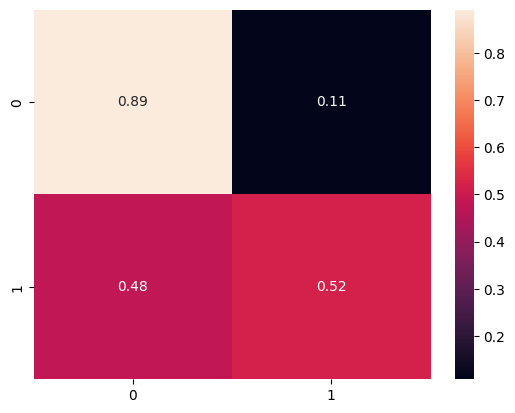

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf = confusion_matrix(y,predictions,normalize='true')
print(conf)
sns.heatmap(conf,annot=True)